In [1]:
import bt

In [2]:
%matplotlib inline

In [44]:
data = bt.get('QQQ', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [45]:
print(data.head())

                  qqq
Date                 
2000-01-03  80.912064
2000-01-04  75.361359
2000-01-05  73.439949
2000-01-06  68.396324
2000-01-07  76.855804


In [46]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [47]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

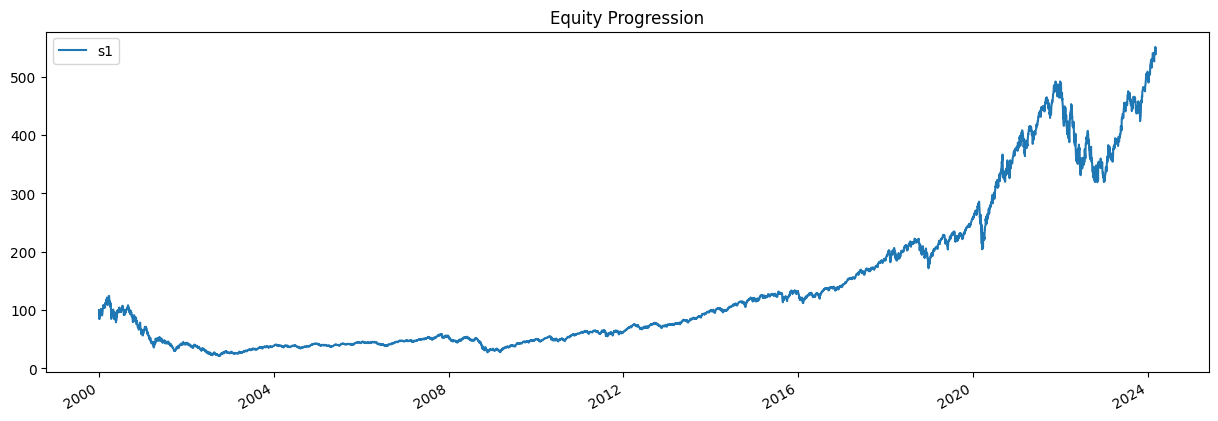

In [48]:
# first let's see an equity curve
res.plot();

In [49]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2000-01-02
End                  2024-03-05
Risk-free rate       0.00%

Total Return         438.91%
Daily Sharpe         0.39
Daily Sortino        0.63
CAGR                 7.22%
Max Drawdown         -82.96%
Calmar Ratio         0.09

MTD                  -0.67%
3m                   12.87%
6m                   15.79%
YTD                  6.48%
1Y                   46.51%
3Y (ann.)            12.92%
5Y (ann.)            20.88%
10Y (ann.)           17.92%
Since Incep. (ann.)  7.22%

Daily Sharpe         0.39
Daily Sortino        0.63
Daily Mean (ann.)    10.69%
Daily Vol (ann.)     27.26%
Daily Skew           0.22
Daily Kurt           7.26
Best Day             16.84%
Worst Day            -11.98%

Monthly Sharpe       0.43
Monthly Sortino      0.69
Monthly Mean (ann.)  10.01%
Monthly Vol (ann.)   23.39%
Monthly Skew         -0.53
Monthly Kurt         1.44
Best Month           19.02%
Worst Month          -26.20%



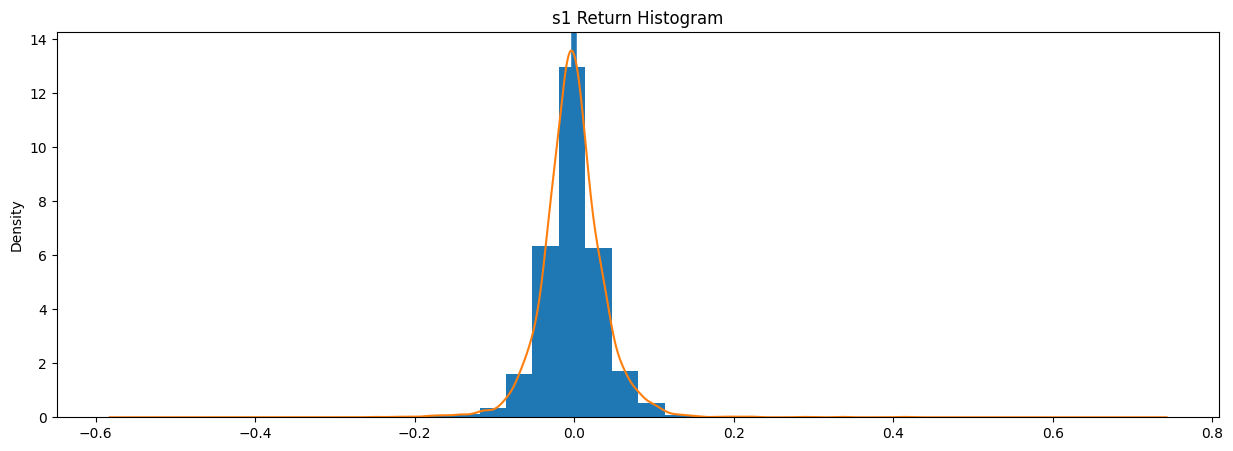

In [25]:
# ok and how does the return distribution look like?
res.plot_histogram()

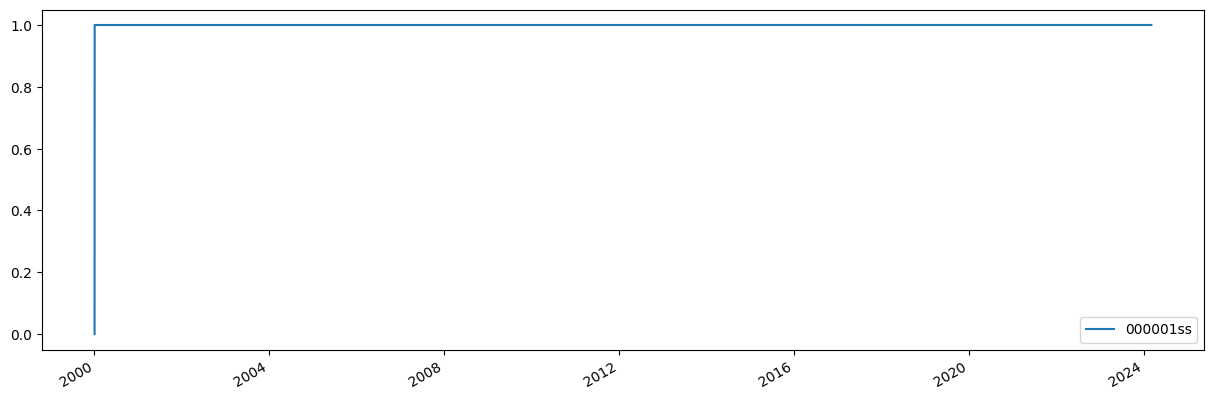

In [10]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

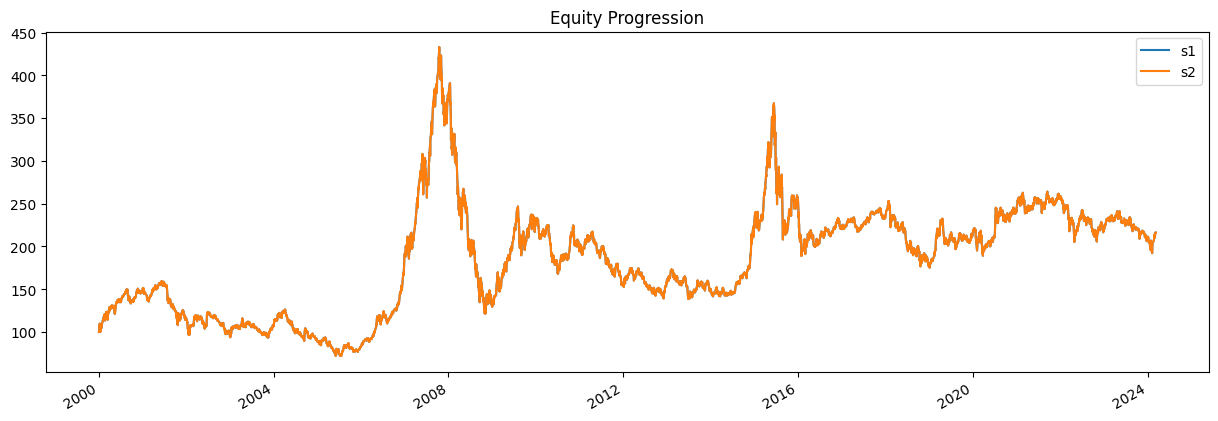

In [11]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

In [12]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2000-01-03  2000-01-03
End                  2024-03-06  2024-03-06
Risk-free rate       0.00%       0.00%

Total Return         116.01%     116.01%
Daily Sharpe         0.26        0.26
Daily Sortino        0.41        0.41
CAGR                 3.24%       3.24%
Max Drawdown         -71.98%     -71.98%
Calmar Ratio         0.04        0.04

MTD                  0.76%       0.76%
3m                   2.33%       2.33%
6m                   -3.80%      -3.80%
YTD                  2.12%       2.12%
1Y                   -8.55%      -8.55%
3Y (ann.)            -3.89%      -3.89%
5Y (ann.)            -0.42%      -0.42%
10Y (ann.)           3.96%       3.96%
Since Incep. (ann.)  3.24%       3.24%

Daily Sharpe         0.26        0.26
Daily Sortino        0.41        0.41
Daily Mean (ann.)    6.09%       6.09%
Daily Vol (ann.)     23.53%      23.53%
Daily Skew           -0.21       -0.21
Daily 